# 第3章: 情報理論

本書は、応用数学レポートの、「第3章: 情報理論」についてのものです。


## 自己情報量

以下の式であらわされるものが、自己情報量。

$$
I(x) = -log(P(x)) = log(W(x))
$$

- 対数の底が 2 のとき、単位は bit.
- 対数の底が e のとき、単位は nat.



- NOTE: 起こりにくい事象（＝生起確率 (が低い事象）の情報量ほど、値が大きい。


In [4]:
import numpy as np
import matplotlib.pyplot as plt

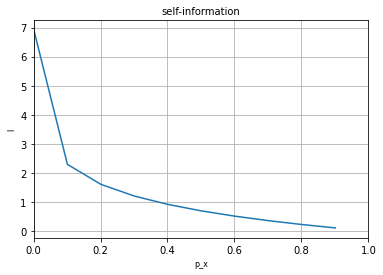

In [5]:
def plot_si(p_x, y):
  plt.plot(p_x,y)

  plt.grid()

  plt.xlim(0,1)

  plt.title('self-information',fontsize=10)

  plt.xlabel('p_x',fontsize=8)
  plt.ylabel('I',fontsize=8)

  plt.show()

p_x = np.arange(0.001,1,0000.1)

def l_nat(w):
  return -np.log(w)

y = l_nat(p_x)

plot_si(p_x, y)

## シャノンエントロピー

シャノンエントロピーは、自己情報量の期待値。平均情報量とも言う。

$$
H(x) = E(I(x)) \\
= -E(log(P(x))) \\
= \sum (P(x)log(P(x)))
$$


- NOTE: ライブラリでの計算

- [scipy.stats.entropy — SciPy v1.7.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)


In [6]:
from scipy.stats import entropy

# エントロピーの値が大きい(コイントスの裏表が同じ確率。 講義資料 page.54 のグラフ x 軸中央)
entropy([1/2, 1/2], base=2)


1.0

In [7]:
entropy([9/10, 1/10], base=2)


0.46899559358928117

## カルバック・ライブラー ダイバージェンス

同じ事象、確率変数における異なる確率分布 P, Q の違いを表す。<br>
( 距離ではない。違い。 )

- NOTE: [Kullback-Leibler Divergenceについてまとめる - 閃き- blog](https://yul.hatenablog.com/entry/2019/01/07/152738)<br>
> 1.2 基本的な性質<br>
... <br>
例として、2つの正規分布間でKL-divergenceを計算*2すると、以下のような値になります。分布のズレが大きくなるほど、値が増加していることがわかります。

上記参考部分のグラフの様に、似たような正規分布でも分布が違うと、カルバック・ライブラー ダイバージェンスの値で違いを表すことができる。

$$
D_{KL} ( P \Vert Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}
$$


## 交差エントロピー

2 つの確率分布 P, Q があるとき、 Q についての自己情報量を P の分布で平均したもの。

$$
H(P, Q) = - \sum_x P(x) \log Q(x)
$$

- NOTE: 損失関数の、交差エントロピー誤差として使用する。<br>
P と Q が近似しないと数値が大きくなる。
